# Implementar un sistema de razonamiento borroso

Utilizar el artículo de investigación que utiliza el sistema Mamdani (u otro articulo similar a elección del alumno) e implementarlo en Skfuzzy tal y como se ha visto en el ejemplo de las propinas.

### Artículo

- Najmurrokhman, A., Komarudin, U., Sadiyoko, A., & Iskanto, T. Y. (2019, December). Mamdani based Fuzzy Logic Controller for A Wheeled Mobile Robot with Obstacle Avoidance Capability. In _2019 International Conference on Mechatronics, Robotics and Systems Engineering (MoRSE)_ (pp. 49-53). IEEE.


### Consideraciones
- Todo aquello relativo a funciones de pertenencia, universos de valores, etc., que no esté claramente explicado en el artículo, puede ser inventado por el alumno usando el sentido común.
- Si va muy lento o da error, se puede comentar la parte gráfica.
- Puede implementarse "a mano" o utilizando el API de control (recomendado).

**Se importan las librerías necesarias**

In [1]:
%matplotlib inline

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Generamos el universo del problema (siguiendo el paper) y las funciones de pertenencia:

In [2]:
max_value_distance = 60
max_value_speed = 70

# Variables de trabajo
distance_left = ctrl.Antecedent(np.arange(0, max_value_distance, 1), 'distance_left')
distance_right = ctrl.Antecedent(np.arange(0, max_value_distance, 1), 'distance_right')
distance_front = ctrl.Antecedent(np.arange(0, max_value_distance, 1), 'distance_front')
speed_left = ctrl.Consequent(np.arange(0, max_value_speed, 1), 'speed_left')
speed_right = ctrl.Consequent(np.arange(0, max_value_speed, 1), 'speed_right')


# Personalizamos las funciones de pertenencia
distance_right['near'] = distance_left['near'] = fuzz.trapmf(distance_left.universe, [0, 0, 10, 20])
distance_right['medium'] = distance_left['medium'] = fuzz.trimf(distance_left.universe, [10, 20, 30])
distance_right['far'] = distance_left['far'] = fuzz.trapmf(distance_left.universe, [20, 30, max_value_distance, max_value_distance])

distance_front['near'] = fuzz.trapmf(distance_front.universe, [0, 0, 5, 10])
distance_front['medium'] = fuzz.trimf(distance_front.universe, [5, 10, 15])
distance_front['far'] = fuzz.trapmf(distance_front.universe, [10, 15, max_value_distance, max_value_distance])

speed_right['slow'] = speed_left['slow'] = fuzz.trapmf(speed_left.universe, [0, 0, 20, 40])
speed_right['medium'] = speed_left['medium'] = fuzz.trimf(speed_left.universe, [20, 40, 60])
speed_right['fast'] = speed_left['fast'] = fuzz.trapmf(speed_left.universe, [40, 60, max_value_speed, max_value_speed])

Mostramos cada una de las funciones de pertenencia definidas:

/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/david/.local/lib/python3.8/site-packages/skfuz

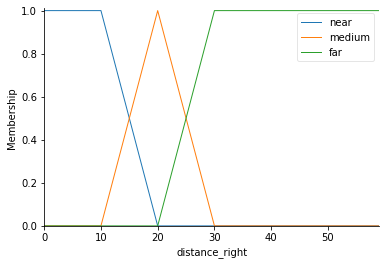

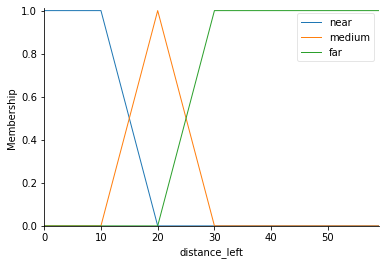

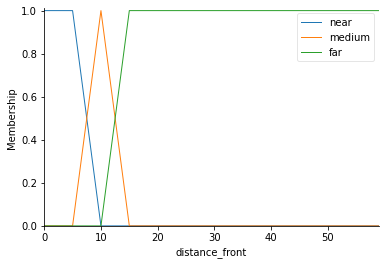

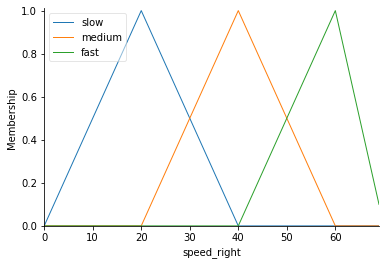

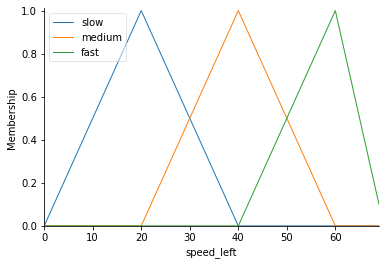

In [3]:
distance_right.view()
distance_left.view()
distance_front.view()
speed_right.view()
speed_left.view()

Creamos las reglas junto con el sistema de inferencia difusa:

In [4]:
# Reglas obtenidas del paper
r1 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['near'] & distance_right['near']),
    consequent=(speed_left['slow'], speed_right['slow'])
)
r2 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['near'] & distance_right['near']),
    consequent=(speed_left['slow'], speed_right['medium'])
)
r3 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['medium'] & distance_right['near']),
    consequent=(speed_left['slow'], speed_right['slow'])
)
r4 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['near'] & distance_right['medium']),
    consequent=(speed_left['medium'], speed_right['slow'])
)
r5 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['medium'] & distance_right['medium']),
    consequent=(speed_left['medium'], speed_right['slow'])
)
r6 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['medium'] & distance_right['near']),
    consequent=(speed_left['slow'], speed_right['medium'])
)
r7 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['near'] & distance_right['medium']),
    consequent=(speed_left['slow'], speed_right['slow'])
)
r8 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['medium'] & distance_right['medium']),
    consequent=(speed_left['medium'], speed_right['medium'])
)
r9 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['medium'] & distance_right['medium']),
    consequent=(speed_left['medium'], speed_right['fast'])
)
r10 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['far'] & distance_right['medium']),
    consequent=(speed_left['fast'], speed_right['fast'])
)
r11 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['medium'] & distance_right['far']),
    consequent=(speed_left['fast'], speed_right['medium'])
)
r12 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['far'] & distance_right['far']),
    consequent=(speed_left['fast'], speed_right['medium'])
)
r13 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['far'] & distance_right['medium']),
    consequent=(speed_left['medium'], speed_right['fast'])
)
r14 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['medium'] & distance_right['far']),
    consequent=(speed_left['medium'], speed_right['medium'])
)
r15 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['far'] & distance_right['far']),
    consequent=(speed_left['fast'], speed_right['fast'])
)
r16 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['far'] & distance_right['far']),
    consequent=(speed_left['fast'], speed_right['medium'])
)
r17 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['near'] & distance_right['far']),
    consequent=(speed_left['slow'], speed_right['slow'])
)
r18 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['far'] & distance_right['near']),
    consequent=(speed_left['medium'], speed_right['fast'])
)
r19 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['near'] & distance_right['near']),
    consequent=(speed_left['slow'], speed_right['medium'])
)
r20 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['near'] & distance_right['far']),
    consequent=(speed_left['medium'], speed_right['slow'])
)
r21 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['far'] & distance_right['near']),
    consequent=(speed_left['medium'], speed_right['medium'])
)
r22 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['far'] & distance_right['medium']),
    consequent=(speed_left['fast'], speed_right['medium'])
)
r23 = ctrl.Rule(
    antecedent=(distance_left['near'] & distance_front['medium'] & distance_right['far']),
    consequent=(speed_left['medium'], speed_right['slow'])
)
r24 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['far'] & distance_right['near']),
    consequent=(speed_left['slow'], speed_right['medium'])
)
r25 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['near'] & distance_right['medium']),
    consequent=(speed_left['slow'], speed_right['slow'])
)
r26 = ctrl.Rule(
    antecedent=(distance_left['far'] & distance_front['medium'] & distance_right['near']),
    consequent=(speed_left['slow'], speed_right['medium'])
)
r27 = ctrl.Rule(
    antecedent=(distance_left['medium'] & distance_front['near'] & distance_right['medium']),
    consequent=(speed_left['slow'], speed_right['slow'])
)


# Array de reglas
rules = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, 
        r11, r12, r13, r14, r15, r16, r17, r18, r19, r20,
        r21, r22, r23, r24, r25, r26, r27
]

# Sistema de inferencia
tipping_ctrl = ctrl.ControlSystem(rules)

# Objeto skfuzzy para la simulación
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Realizamos una serie de pruebas (utilizando como referencia la Tabla II del *paper*):

Es necesario mover el motor derecho a 20.00 rpm y el motor izquierdo a 40.00 rpm


/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


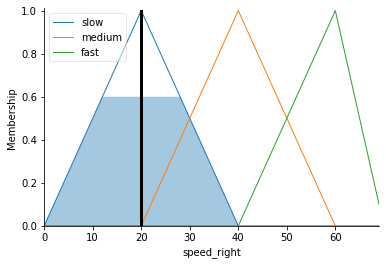

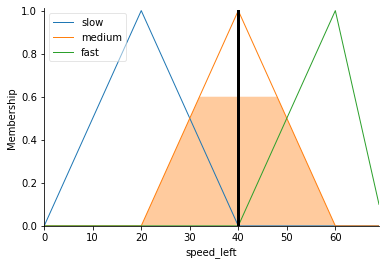

In [5]:
# primer ejemplo
tipping.input['distance_left'] = 4
tipping.input['distance_front'] = 4
tipping.input['distance_right'] = 26

tipping.compute()

print("Es necesario mover el motor derecho a {mr:.2f} rpm y el motor izquierdo a {ml:.2f} rpm".format(
    mr=tipping.output['speed_right'],
    ml=tipping.output['speed_left'],
))

speed_right.view(sim=tipping)
speed_left.view(sim=tipping)

Es necesario mover el motor derecho a 20.00 rpm y el motor izquierdo a 20.00 rpm


/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


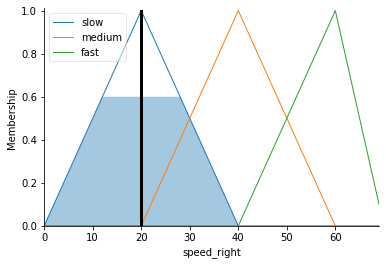

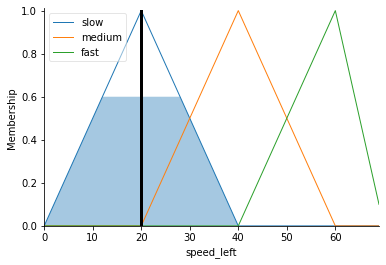

In [6]:
# segundo ejemplo
tipping.input['distance_left'] = 33
tipping.input['distance_front'] = 4
tipping.input['distance_right'] = 26

# Realizar los cálculos
tipping.compute()

print("Es necesario mover el motor derecho a {mr:.2f} rpm y el motor izquierdo a {ml:.2f} rpm".format(
    mr=tipping.output['speed_right'],
    ml=tipping.output['speed_left'],
))

speed_right.view(sim=tipping)
speed_left.view(sim=tipping)

¿Qué pasaría sin nos encontramos muy lejos de un objetivo? La lógica nos dice que los motores del robot deberían de moverse muy rápido porque no hay obstáculos cerca. Vamos a comprobarlo:

Es necesario mover el motor derecho a 56.62 rpm y el motor izquierdo a 56.62 rpm


/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


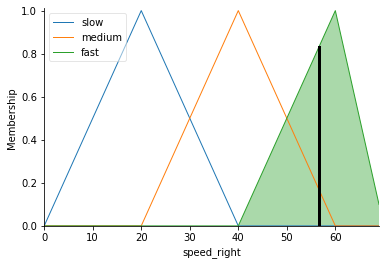

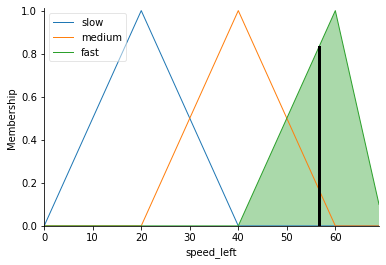

In [7]:
# tercer ejemplo
tipping.input['distance_left'] = 70
tipping.input['distance_front'] = 70
tipping.input['distance_right'] = 70

# Realizar los cálculos
tipping.compute()

print("Es necesario mover el motor derecho a {mr:.2f} rpm y el motor izquierdo a {ml:.2f} rpm".format(
    mr=tipping.output['speed_right'],
    ml=tipping.output['speed_left'],
))

speed_right.view(sim=tipping)
speed_left.view(sim=tipping)

¿Qué pasaría sin nos encontramos muy cerca de una pared en los tres sensores? La lógica nos dice que los motores del robot deberían de moverse superlento. Vamos a comprobarlo:

Es necesario mover el motor derecho a 20.00 rpm y el motor izquierdo a 20.00 rpm


/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/david/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


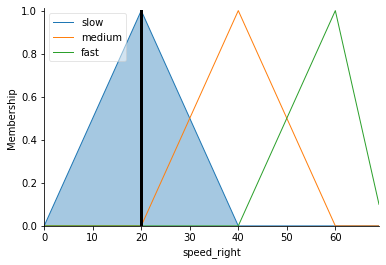

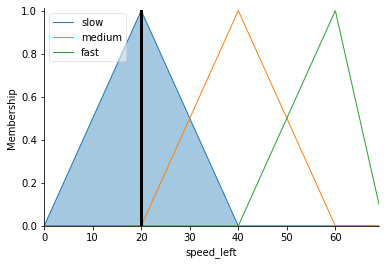

In [8]:
# cuarto ejemplo
tipping.input['distance_left'] = 1
tipping.input['distance_front'] = 1
tipping.input['distance_right'] = 1

# Realizar los cálculos
tipping.compute()

print("Es necesario mover el motor derecho a {mr:.2f} rpm y el motor izquierdo a {ml:.2f} rpm".format(
    mr=tipping.output['speed_right'],
    ml=tipping.output['speed_left'],
))

speed_right.view(sim=tipping)
speed_left.view(sim=tipping)

Siguiendo el Notebook *SkfuzzyIntro*, se añade una opción interactiva para poder realizar las pruebas oportunas:

In [9]:
from ipywidgets import interact_manual
def show_inference(distance_left, distance_front, distance_right):
    tipping.input['distance_left'] = distance_left
    tipping.input['distance_front'] = distance_front
    tipping.input['distance_right'] = distance_right

    # Realizar los cálculos
    tipping.compute()
    
    # Visualizar el resultado
    print("Es necesario mover el motor derecho a {mr:.2f} rpm y el motor izquierdo a {ml:.2f} rpm".format(
        mr=tipping.output['speed_right'],
        ml=tipping.output['speed_left'],
    ))
    speed_right.view(sim=tipping)
    speed_left.view(sim=tipping)

# Se ha escogido un interact_manual para evitar latencia
distance_range = (0,70,1)
interact_manual(
    show_inference,
    distance_left=distance_range,
    distance_front=distance_range,
    distance_right=distance_range
);

interactive(children=(IntSlider(value=35, description='distance_left', max=70), IntSlider(value=35, descriptio…